In [16]:
# Import all the necessary libraries

import copy
import math

import numpy as np  
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import mplcursors
import mpld3

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import torch
print(torch.__version__)

%matplotlib inline

1.3.1


## Read the CSV and Perform Basic Data Cleaning

In [17]:
df = pd.read_csv("googleplaystore.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [18]:
#df.info()#Check the data type of the column values whether they are object or float
#df.info()

In [19]:
# Get names of indexes for which column has  a non numeric value
indexNames = df[ df['Size'] == 'Varies with device' ].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [20]:
# Get rid of the non numeric values from the rows with numbers

df['Price'] = df['Price'].apply(lambda x: x.replace('$', '')
                                if isinstance(x, str) else x).astype(float)
df['Reviews'] = df['Reviews'].apply(lambda x: x.replace('M', '').replace(',', '').replace('+', '')
                                if isinstance(x, str) else x).astype(float) 
df['Size'] = df['Size'].apply(lambda x: x.replace('M', '').replace(',', '').replace('+', '').replace('k', '')
                                if isinstance(x, str) else x).astype(float) 
df['Installs'] = df['Installs'].apply(lambda x: x.replace('M', '').replace(',', '').replace('+', '')
                                if isinstance(x, str) else x).astype(float) 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   float64
 4   Size            7723 non-null   float64
 5   Installs        7723 non-null   float64
 6   Type            7723 non-null   object 
 7   Price           7723 non-null   float64
 8   Content Rating  7723 non-null   object 
 9   Genres          7723 non-null   object 
 10  Last Updated    7723 non-null   object 
 11  Current Ver     7723 non-null   object 
 12  Android Ver     7723 non-null   object 
dtypes: float64(5), object(8)
memory usage: 844.7+ KB


In [21]:
#Save the clean data frame as a new csv file
#app_df.to_csv('df')

In [22]:
# Clean the CSV DF Column headers
app_df = df.rename(columns = {'Content Rating':'ContentRating','Last Updated':'LastUpdated', 'Current Ver':'CurrentVer','Android Ver':'AndroidVer'})
app_df_copy = app_df.copy(deep=True)
app_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [23]:
#PyTorch

In [24]:
#dtype = torch.float
#device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

In [25]:
app_df_copy.head()

app_df_copy.fillna(0.1)

data_g = app_df_copy[['Reviews', 'Price', 'Size', 'Installs']]

#Normalize.
data_g = data_g.apply(
    lambda x: (x - x.mean()) / x.std()
)

data_g['Rating'] = app_df_copy.Rating

data_g

,Reviews,Price,Size,Installs,Rating
0,-0.158128,-0.064807,-0.195709,-0.167753,4.1
1,-0.157694,-0.064807,-0.249161,-0.157984,3.9
2,-0.111264,-0.064807,-0.305820,-0.068266,4.7
3,-0.042520,-0.064807,-0.131567,0.828909,4.5
4,-0.157694,-0.064807,-0.368893,-0.165959,4.3
...,...,...,...,...,...
10833,-0.158189,-0.064807,6.218506,-0.167933,4.8
10834,-0.158209,-0.064807,-0.371031,-0.167943,4.0
10836,-0.158193,-0.064807,0.167763,-0.167853,4.5
10837,-0.158211,-0.064807,-0.360341,-0.167951,5.0


In [26]:
X_g = data_g.drop('Rating', axis=1).to_numpy()
Y_g = data_g['Rating'].to_numpy()
#X_g

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X_g, Y_g, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(5406, 4)
(2317, 4)
(5406,)
(2317,)


In [28]:
#Convert inputs to tensors.
n_train = X_train.shape[0]
X_train = torch.tensor(X_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)
Y_train = torch.tensor(Y_train, dtype=torch.float).view(-1, 1)
Y_test = torch.tensor(Y_test, dtype=torch.float).view(-1, 1)
X_train

tensor([[-0.1498, -0.0648,  3.5887, -0.0683],
        [-0.1570, -0.0648,  0.1571, -0.1580],
        [ 0.0668, -0.0648, -0.0674,  0.0314],
        ...,
        [-0.0401, -0.0648, -0.2812,  0.0314],
        [-0.1226, -0.0648, -0.1957, -0.1480],
        [-0.1582, -0.0648,  2.2310, -0.1679]])

In [29]:
#Construct the neural network.
#We use nn.Sequential defines a neural network with one layer and initialize it. ***
w_num = X_train.shape[1]
net = torch.nn.Sequential(
    torch.nn.Linear(w_num, 1) # only one output, i.e., rating
)

torch.nn.init.normal_(net[0].weight, mean=0, std=0.1)
torch.nn.init.constant_(net[0].bias, val=0)

Parameter containing:
tensor([0.], requires_grad=True)

In [30]:
#DataLoader is implemented in PyTorch, which will return an iterator to iterate training data by batch. 
datasets = torch.utils.data.TensorDataset(X_train, Y_train)

In [31]:
#Generate a DataLoder by using this Dataset.
train_iter = torch.utils.data.DataLoader(datasets, batch_size=45, shuffle=True) # batch_size
#print(train_iter)

In [32]:
loss = torch.nn.MSELoss() #Loss model - Mean Square Error(MSE)

In [33]:
#Optimize the neural network by stochastic gradient descent.
#Here 0.001 is the learning rate.
optimizer = torch.optim.SGD(net.parameters(), lr=0.001) # Need to tune the leaning rate, higher rates perfrom much worse

In [34]:
#Start training.
#Train the training set for n epochs. The training process is roughly as follows.
# Feed forward neural network with back propagation. ***
# 1. Load a batch of data.
# 2. Predict the batch of the data through net.
# 3. Calculate the loss value by predict value and true value.
# 4. Clear the grad value optimizer stored.
# 5. Backpropagate the loss value.
# 6. Update optimizer.

num_epochs = 10
for epoch in range(num_epochs):
    for x, y in train_iter:
        output = net(x)
        l = loss(output, y)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print("epoch {} loss: {:.4f}".format(epoch + 1, l.item()))

epoch 1 loss: 10.6447
epoch 2 loss: 7.3169
epoch 3 loss: 4.6508
epoch 4 loss: 3.0590
epoch 5 loss: 1.3431
epoch 6 loss: 1.1288
epoch 7 loss: 1.6842
epoch 8 loss: 0.8494
epoch 9 loss: 0.5552
epoch 10 loss: 0.3182


In [35]:
#Check its performance on the testing dataset.
print(loss(net(X_test), Y_test).item()) #Loss value

0.42925554513931274


In [36]:
#Watch the prediction of a sample.
print(net(X_test[0]).data)
print(Y_test[0])

tensor([3.7989])
tensor([3.3000])


In [37]:
num_of_rows = X_test.shape[0]

Y_test_num = [] 
Y_predicted_num = []

for i in range(0,num_of_rows) :
    #print(str(net(X_test[i]).tolist()[0]) + " " + str(Y_test[i].tolist()[0]))
    Y_test_num.append(Y_test[i].tolist()[0]) 
    Y_predicted_num.append(net(X_test[i]).tolist()[0]) # prediction

avg_error = 0    
avg_acc = 0

#print("Actual, Predicted, Error, Accuracy")    
for i in range(0,num_of_rows) :
    error = ((Y_test_num[i] - Y_predicted_num[i])/Y_test_num[i])*100.0
    acc = (Y_predicted_num[i] / Y_test_num[i])*100.0 
    avg_error = avg_error + error
    avg_acc = avg_acc + acc
    #print(str(Y_test_num[i]) + " " + str(Y_predicted_num[i]) + " " + str(error) + "% " + str(acc) + "%")
    
avg_error = avg_error / num_of_rows     
print("Average error: " + str(avg_error) + "%")

avg_acc = avg_acc / num_of_rows 
print("Average accuracy: " + str(avg_acc) + "%")

out_df = pd.DataFrame(list(zip(Y_test_num, Y_predicted_num)), columns =['Actual', 'Predicted']) 
out_df.head(10)

Average error: 6.667050623007088%
Average accuracy: 93.33294937699284%


,Actual,Predicted
0,3.3,3.798851
1,4.6,3.801570
2,3.5,3.794671
3,4.1,3.801726
4,4.8,3.800704
5,3.5,3.801162
6,4.2,3.791376
7,4.1,3.736704
8,4.5,3.995337
9,4.3,3.788315


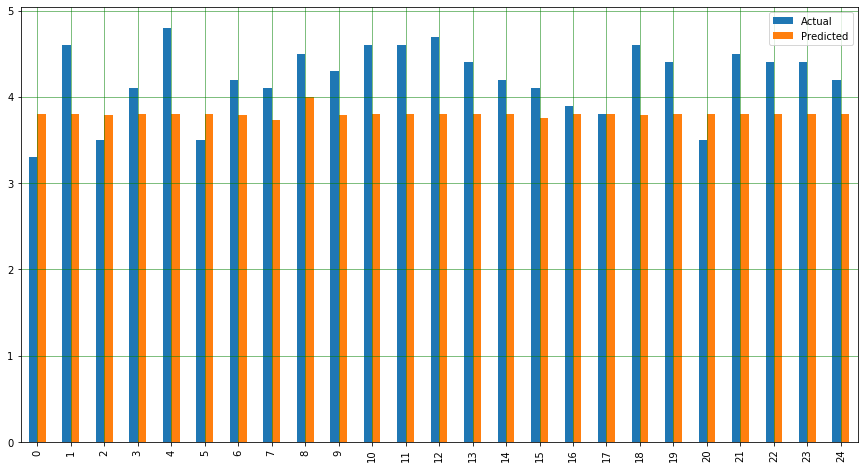

In [43]:
# Plot the comparison of Actual and Predicted value
out_df1 = out_df.head(25)
out_df1.plot(kind='bar',figsize=(15,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_num, Y_predicted_num))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_num, Y_predicted_num))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_num, Y_predicted_num)))

Mean Absolute Error: 0.5614113485602197
Mean Squared Error: 0.42925554164246793
Root Mean Squared Error: 0.6551759623509306
